In [4]:
defaultW <- getOption("warn") 

options(warn = -1)
##Import the data
newpizza<-read.csv('/Users/georgeli/Desktop/stat3011/Project 2/pizza__GDP.csv')
library(tree)
library(ISLR)
newpizza[1:2,]

,X,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,⋯,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price,GDP
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>
1,1778,AVwdbU__IN2L1WUfvtBm,1000 Mall Of San Juan Blvd,Restaurant,San Juan,US,us/altdeberwind/sanjuan/1000mallofsanjuanblvd/-1945207861,18.41183,-66.02487,,⋯,"Boursin, mozzarella, arugula, parmesan",Sausage Onion Jam Pizza,Brio Tuscan Grille - Puerto Rico,924,USD,0,30,Alt De Berwind,8.95,146826
2,2980,AVwdwjsLkufWRAb58_Vm,424,"Pizza Delivery,Grocers-Ethnic Foods,Italian Grocery Stores,Restaurants,Italian Foods,Grocery Stores,Pizza Restaurants,Italian Restaurants,Pizza,Pizza Place",Chicopee,US,us/ma/chicopee/424/595885510,42.14798,-72.60071,http://www.yellowpages.com/chicopee-ma/mip/johns-pizzeria-605613/menu?lid=1001612527212,⋯,,Combination Pizza (extra Large 28 Pieces),John's Pizzeria,1013,,NA,NA,MA,22.00,52229


In [6]:
###Find the mean of average_price to set the expensive rule for the price
mean(newpizza$average_price)
#define the price as normal if less or equal to mean, otherwise expensive.
Price=factor(ifelse(newpizza$average_price<=11.96,"Normal","Expensive"))
###Find the mean of GDP to define the high GDP
mean(newpizza$GDP)
High_GDP=factor(ifelse(newpizza$GDP>=96356.96,1,0))
##Merge new columns(Price & High_GDP) to the data set
newpizza1=data.frame(newpizza,Price,High_GDP)
newpizza1[1:2,]

[1] 11.95692

[1] 96356.96

,X,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,⋯,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province,average_price,GDP,Price,High_GDP
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<fct>,<fct>
1,1778,AVwdbU__IN2L1WUfvtBm,1000 Mall Of San Juan Blvd,Restaurant,San Juan,US,us/altdeberwind/sanjuan/1000mallofsanjuanblvd/-1945207861,18.41183,-66.02487,,⋯,Brio Tuscan Grille - Puerto Rico,924,USD,0,30,Alt De Berwind,8.95,146826,Normal,1
2,2980,AVwdwjsLkufWRAb58_Vm,424,"Pizza Delivery,Grocers-Ethnic Foods,Italian Grocery Stores,Restaurants,Italian Foods,Grocery Stores,Pizza Restaurants,Italian Restaurants,Pizza,Pizza Place",Chicopee,US,us/ma/chicopee/424/595885510,42.14798,-72.60071,http://www.yellowpages.com/chicopee-ma/mip/johns-pizzeria-605613/menu?lid=1001612527212,⋯,John's Pizzeria,1013,,NA,NA,MA,22.00,52229,Expensive,0



Classification tree:
tree(formula = Price ~ . - average_price, data = newpizza1)
Variables actually used in tree construction:
[1] "menus.amountMin" "menus.amountMax"
Number of terminal nodes:  3 
Residual mean deviance:  0.01663 = 25.84 / 1554 
Misclassification error rate: 0.001285 = 2 / 1557 

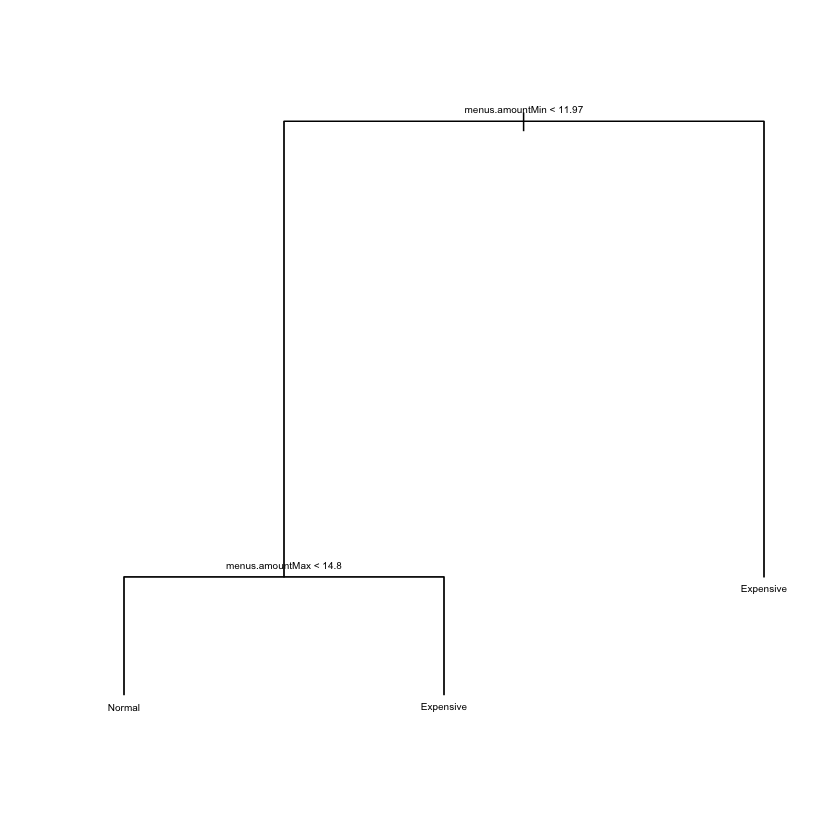

In [7]:
##Use the decision tree
tree.pizza=tree(Price ~ .-average_price,newpizza1)
summary(tree.pizza)
plot(tree.pizza)
text(tree.pizza,cex=0.5,pretty=0)

Firstly,the decision tree shows if the menus.min is bigger than $11.97, the pizza price is expensive.

Secondly,when the menus.min is smaller than 11.97  and the menus.max is bigger than $14.8, the pizza price is expensive.

Last, when the menus.min is smaller than 11.97 and the menus.max is also smaller than $14.8, the pizza price is Normal.


In [9]:
###test the decision tree accuracy
train=sample(1:nrow(newpizza1),3000)###Use 3000 samples for traning 
pizza.test=newpizza1[-train,] ### For the test data, use remaining data for test
price.test=newpizza1$Price[-train]### the test data to check the accuracy
tree.pizza2=tree(Price~.-average_price,newpizza1,subset=train)#build the decision tree
summary(tree.pizza2)


Classification tree:
tree(formula = Price ~ . - average_price, data = newpizza1, subset = train)
Variables actually used in tree construction:
[1] "menus.amountMin" "menus.amountMax"
Number of terminal nodes:  3 
Residual mean deviance:  0.01896 = 25.34 / 1337 
Misclassification error rate: 0.001493 = 2 / 1340 

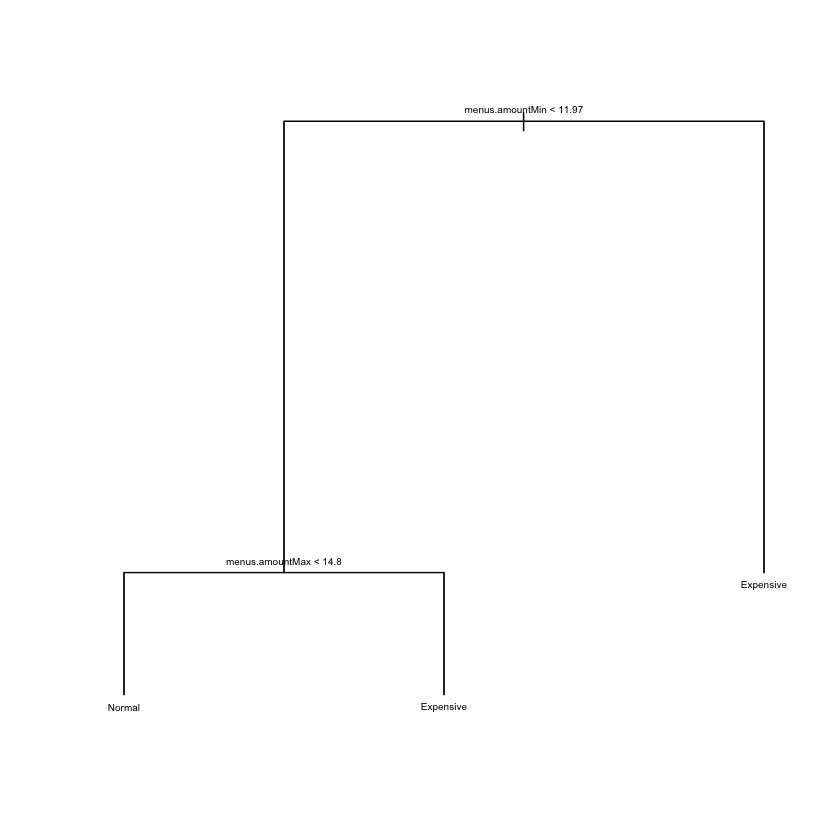

In [10]:
plot(tree.pizza2)
text(tree.pizza2,cex=0.5,pretty=0)

In [11]:
tree.pred=predict(tree.pizza2,pizza.test,type="class")

#Show the confusion table
table(tree.pred, price.test)
#Compute the classification accuracy
sum(diag(table(tree.pred, price.test)))/sum(table(tree.pred, price.test))


           price.test
tree.pred   Expensive Normal
  Expensive       196      2
  Normal            0    312

[1] 0.9960784

In [12]:
###Crossvalidation for finding the best node numbers for the decision tree
set.seed(1)
cv.pizza=cv.tree(tree.pizza2,FUN=prune.misclass)
names(cv.pizza)##find out the factors in cv.pizza

[1] "size"   "dev"    "k"      "method"

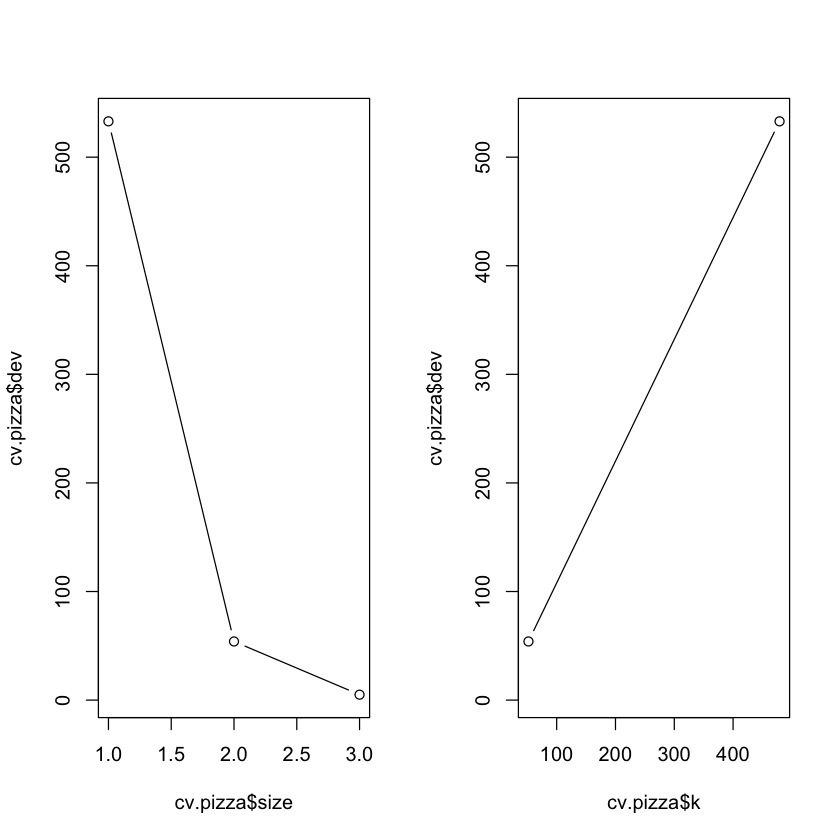

In [13]:
##plot the CV plot the check which node number is the best.
par(mfrow=c(1,2))
plot(cv.pizza$size,cv.pizza$dev,type="b")
plot(cv.pizza$k,cv.pizza$dev,type="b")

From the standard deviation, we found that when the node numbers are 3, the sd is the smallest.

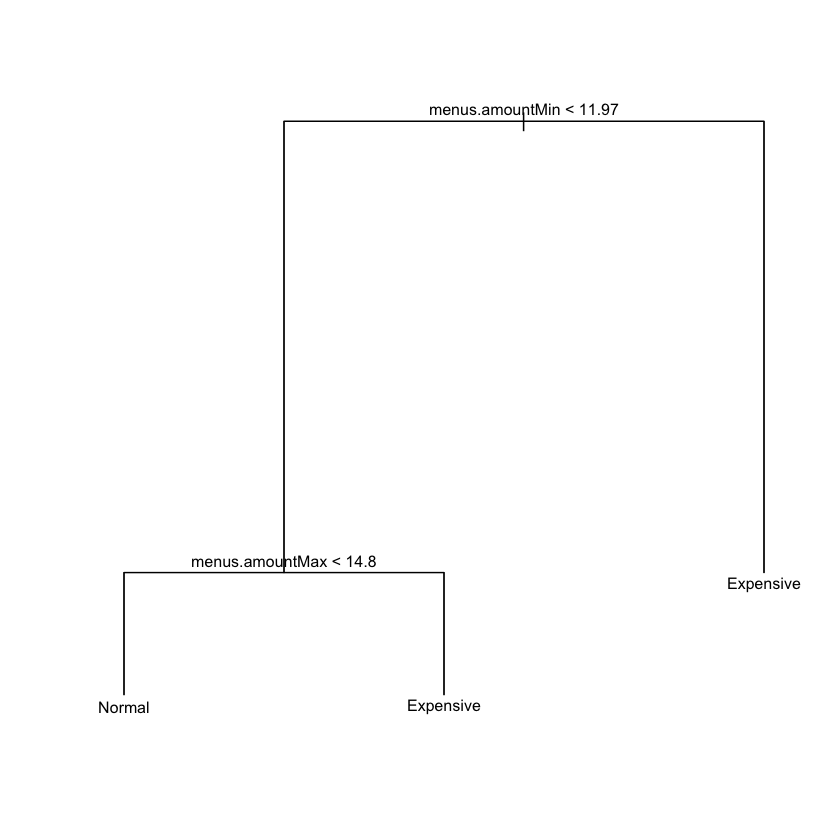

In [14]:
###Use node numbers equal to 3 to do the decision tree.
prune.pizza=prune.misclass(tree.pizza2,best=3)
plot(prune.pizza)
text(prune.pizza,pretty=0,cex=0.8)
tree.pred2=predict(prune.pizza,pizza.test,type="class")

In [15]:
#Show the confusion table
table(tree.pred2,price.test)
#Compute the classification accuracy
sum(diag(table(tree.pred2, price.test)))/sum(table(tree.pred2, price.test))


           price.test
tree.pred2  Expensive Normal
  Expensive       196      2
  Normal            0    312

[1] 0.9960784